### 70. Climbing Stairs

In [ ]:
class Solution:
    def climbStairs(self, n: int) -> int:
        dp = [0] * (n+1)
        dp[0] = 1 # there is exactly 1 way to climb 0 steps
        dp[1] = 1 # there is exactly 1 way to climb 1 step

        # we can climb n stairs by climbing n-2 stairs and then climbing another two stairs 
        # we can also climb n stairs by climbing n-1 stairs and the climbing one more stair
        # so in total we can climb n stairs as the sum of ways we can climb n-2 stairs and the ways we can climb n-1 stairs
        def ways(n):
            if dp[n]: return dp[n]

            dp[n-1] = ways(n-1)
            dp[n-2] = ways(n-2)
            return dp[n-1] + dp[n-2]

        return ways(n)

- What we are basically calculating here is the **Fibonacci Number**.
- We create a dynamic programming list, `dp`, where the indices represent the number of steps and the values represent the number of ways to climb them.
- Since we can climb 1 or 2 steps per step, every step can be climbed either from the step 2 steps below or the step 1 step below. Therefore, the number of ways to climb a step is the sum of the number of ways to step onto step 1 below plus the number of ways to step onto step 2 below.

### 91. Decode Ways

In [ ]:
class Solution:
    def numDecodings(self, s: str) -> int:
        
        dp = [0]*(len(s)+1)
        dp[len(s)] = 1 

        for i in range(len(s)-1, -1, -1):
            # if the number at index i starts with a "0" it can't be a valid number
            # therefore the number of decode ways at that index is 0
            if s[i] == "0": 
                dp[i] = 0
            else: 
                dp[i] = dp[i+1]

            # the number starting at index i is a valid two digit number (between 1-26)
            if i+1 < len(s) and (s[i] == "1" or s[i] == "2" and s[i+1] in "0123456"):
                dp[i] += dp[i+2]

        return dp[0]

- This problem can be solved via **Top-Down Dynamic Programming**, where the value at an index in `dp` represents the number of ways to decode the number starting at that index.
- If the number at the current index is a valid one-digit number (between 1 and 9), the number of decode ways at that index is at least equal to the number of decode ways at the previous index.
- If the number at the current index is also a valid two-digit number (between 10 and 26), the number of decode ways at the index gets increased by the number of ways to decode at the index to the right of the two-digit number.
- To better understand why this works, I have provided a graphic representation of the **Recurrence Relation** below.

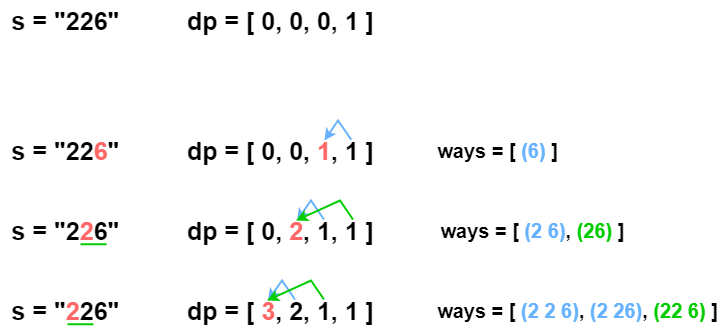

### 198. House Robber

In [ ]:
class Solution:
    def rob(self, nums: List[int]) -> int:
        
        nums.append(0)
        for i in range(len(nums)-3, -1, -1):
            nums[i] = max(nums[i]+nums[i+2], nums[i+1])

        return max(nums[0],nums[1])

- We solve the problem using a **Top-Down Dynamic Programming** approach, making a decision between robbing the current house and the neighbor's neighbor or robbing only the neighbor of the current house.
- At the end of this, we will have the maximum profit starting at house 1 and house 2 saved in `nums[0]` and `nums[1]`, respectively, and we will return the larger profit among those two.

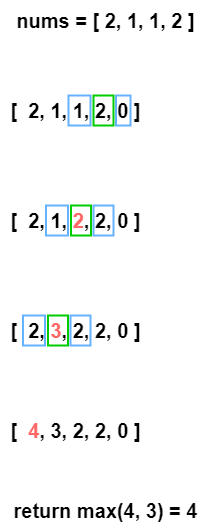

### 213. House Robber II

In [ ]:
class Solution:
    def rob(self, nums: List[int]) -> int:
        if len(nums) <= 3: return max(nums)
        
        last_house_removed = nums[:len(nums)-1]
        first_house_removed = nums[1:]
        last_house_removed.append(0)
        first_house_removed.append(0)

        for i in range(len(last_house_removed)-3, -1, -1):
            first_house_removed[i] = max( first_house_removed[i+1], first_house_removed[i]+first_house_removed[i+2] )
            last_house_removed[i] = max( last_house_removed[i+1], last_house_removed[i]+last_house_removed[i+2] )

        return max( max(first_house_removed[0], first_house_removed[1]), max(last_house_removed[0], last_house_removed[1]) )

- This solution is quite similar to the previous version, but the slight difference is that we are calculating the maximum profit for the row of houses excluding the first, `first_house_removed`, and the maximum profit for the row of houses excluding the last house, `last_house_removed`.
- Lastly, we return the larger profit among the maximum profits for these two rows of houses.

### 322. Coin Change

In [ ]:
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        dp = [amount+1] * (amount+1)
        dp[0] = 0

        for amount in range(1,amount+1):
            for coin in coins:
                if amount - coin >= 0:
                    dp[amount] = min(dp[amount], dp[amount-coin]+1)

        return dp[amount] if dp[amount] != amount+1 else -1

- This problem could be solved via **Bottom-Up Dynamic Programming**.
- How it works is that we iterate over all possible amounts, starting from `1` all the way up to `amount`.
- We will also try out every `coin` for each `amount`, and set the number of coins needed to make up a certain amount, `dp[amount]`, to the smaller value between the current number of ways to make up the amount and the number of ways to make up the amount minus the current `coin` (we also add `1` because we needed one more coin to make up `dp[amount]`).

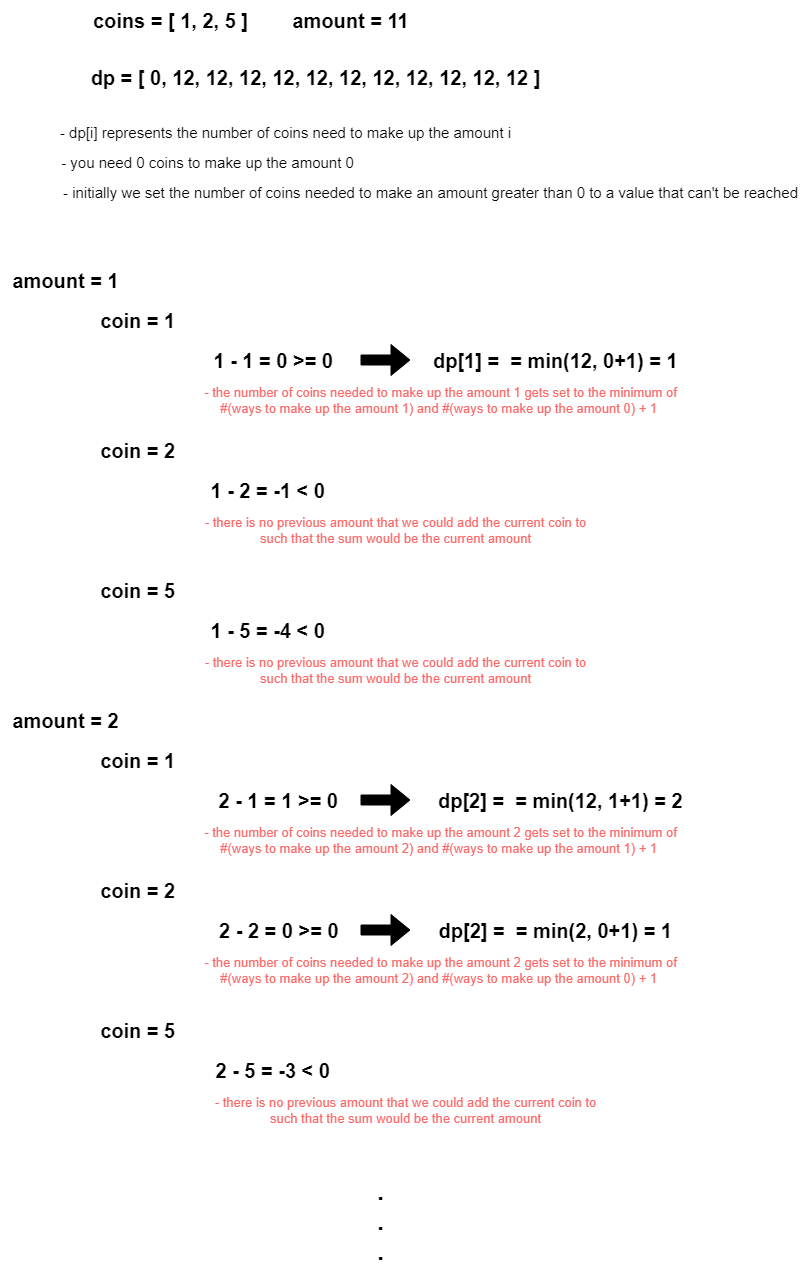

### 377. Combination Sum IV

In [ ]:
class Solution:
    def combinationSum4(self, nums: List[int], target: int) -> int:
        # dp[i] = number of ways to sum up to target i
        dp = [0]*(target+1)
        # 1 way to sum to 0 (using no numbers)
        dp[0] = 1
        
        for target in range(1,target+1):
            for num in nums:
                ## if there is a preceding sum that num
                ## can add on to to make the current target
                ## increase num of ways to make it by that
                if target-num >= 0:
                    dp[target] += dp[target-num]
                    
        return dp[target]

- This problem could be solved via **Bottom-Up Dynamic Programming**, and the solution is very similar to the solution of *322. Coin Change*.
- If we rephrase this problem as finding every possible way, including different orders, to sum up to an `amount` where `nums` represents the `coins` and `target` represents the `amount`, the only thing we are doing differently here is sum up **every possible way of reaching the current amount**, `i` in `dp`, from the number of ways to make up a previous amount, whereas in the other problem we are finding the **smallest number of coins needed to reach the current amount** by looking at the number of coins needed to reach a previous amount.

### 518. Coin Change II

In [ ]:
class Solution:
    def change(self, amount: int, coins: List[int]) -> int:
        dp = [0] * (amount+1)  # one index per amount from 0 to amount
        dp[0] = 1  # there is exactly 1 way to make 0 (by using no coins)
        for coin in coins:
            for i in range(coin, amount+1):
                dp[i] += dp[i-coin]
        return dp[amount]

- We utilize a dynamic programming list `dp` to build up the solution incrementally. Every index represents an `amount` that can be made up with the `coins`, and the value at an index represents the number of ways that `amount` can be made up.
- How it works is best explained in the graphic below.

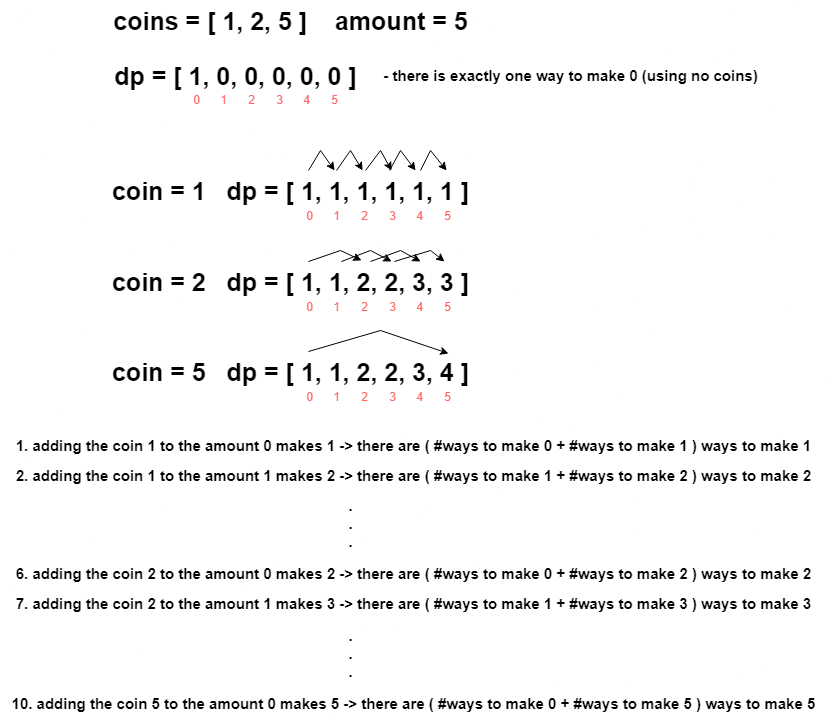

### 746. Min Cost Climbing Stairs

In [ ]:
class Solution:
    def minCostClimbingStairs(self, cost: List[int]) -> int:
        dp = [0]*(len(cost)+2)

        for i in reversed(range(len(cost))):
            dp[i] = min(cost[i]+dp[i+1], cost[i]+dp[i+2])

        return min(dp[0], dp[1])

- To solve this problem, we use a dynamic programming list, `dp`, that will hold the minimum cost to reach the top for every stair.
- We start 1 step below the top of the stair and construct `dp` in a descending manner.
- The minimum cost to reach the top for a step, `dp[i]`, will be the minimum of the cost for the current stair, `cost[i]`, plus the cost to reach the top from one step further or two steps further, which are stored in `dp[i+1]` and `dp[i+2]`, respectively.
- Since we can only start from step 1 or step 2, we need to return the smaller cost to reach the top among the costs for those two steps.

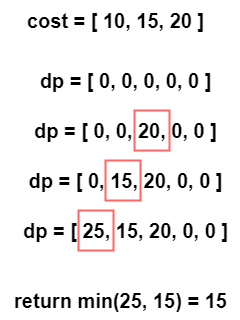

### 2369. Check if There is a Valid Partition For The Array

In [ ]:
class Solution:
    def validPartition(self, nums: List[int]) -> bool:

        def isValid(i: int):
            if i < 0: return True

            if ( nums[i] == nums[i-1] and isValid(i-2) ) or \
                ( nums[i] == nums[i-1] == nums[i-2] and isValid(i-3) ) or \
                ( nums[i] == nums[i-1]+1 == nums[i-2]+2 and isValid(i-3) ):
                    return True
            return False
            
        return isValid(len(nums)-1)

- How it works is that we start at the last index of `nums`, and recursively moving to the front, we check for the three valid partitions.
- If the last two to three fields form a valid partition and the index ahead of them is also the end of a valid partition, `isValid` returns `True`.

### 2707. Extra Characters in a String

In [ ]:
class Solution:
    def minExtraChar(self, s: str, dictionary: List[str]) -> int:
        dp = [0] * 51
        
        for i in range(len(s)-1, -1, -1):
            # every step we get one more extra letter
            dp[i] = dp[i+1] + 1 
            for word in dictionary:
                # "add" current word to position 
                # if it is within bounds and equal to s from that position
                if i + len(word) <= len(s) and s[i:i+len(word)] == word:
                    # the minimum extra letters at this pos is the 
                    # smaller one between the extra letters one pos
                    # after the matched word and the number of extra 
                    # letters in the current position
                    dp[i] = min(dp[i], dp[i+len(word)])
        return dp[0]

- To solve this problem, we start at the last character in `s` and iterate to the first character.
- In every iteration, we increase the number of extra characters at the current position in `dp` by `1` according to the previous position.
- Then we try every `word` from the given `dictionary` at the current position and set the number of extra letters in the current position to the smallest possible value across the matching words right neighbors.